In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
#import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 0, 'date')

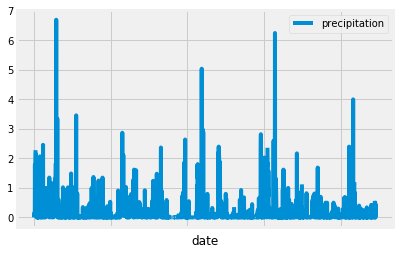

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
q = session.query(Measurement.date,Measurement.prcp)

# Calculate the date 1 year ago from the last data point in the database
last = q.order_by(Measurement.date.desc()).first()
lastday = datetime.strptime(last[0],'%Y-%m-%d').date()
startday = lastday.replace(lastday.year-1)

# Perform a query to retrieve the data and precipitation scores
data = np.array(q.order_by(Measurement.date).filter(Measurement.date>=startday).all())
#data

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data[:,1],index=data[:,0],columns=['precipitation'])
df[['precipitation']] = df[['precipitation']].apply(pd.to_numeric)
#df

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot()
ax.set_xlabel('date')

In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [11]:
# Design a query to show how many stations are available in this dataset?
session.query(func.distinct(Measurement.station)).count()

9

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    group_by(Measurement.station).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

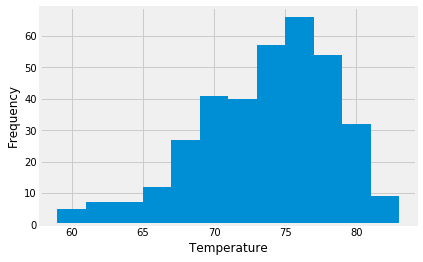

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
q = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=='USC00519281')
last = q.order_by(Measurement.date.desc()).first()
lastday = datetime.strptime(last[0],'%Y-%m-%d').date()
startday = lastday.replace(lastday.year-1)
data = np.array(q.order_by(Measurement.date).filter(Measurement.date>=startday).all())
plt.hist([float(d) for d in data[:,1]],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')